In [1]:
# Procesado y tratamiento de los datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.over_sampling import RandomOverSampler

# División del dataset
from sklearn.model_selection import train_test_split

# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Modelos utilizados 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Métricas de evaluación
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Otros
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataset de entrenamiento
data=pd.read_csv('train.csv')
# Visualización inicial del conjunto de datos
data

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
...,...,...,...,...,...,...,...,...,...,...
6996,6996,21,0,6.576106,301.050638,146.682819,-209.480741,-129.776336,-51.226256,1
6997,6997,18,57,-6.169382,-317.652257,-161.644320,248.055724,-112.626344,99.463913,0
6998,6998,22,47,-7.289684,-406.732525,-212.097250,248.745127,116.893077,32.806150,0
6999,6999,18,14,-92.317105,-191.555040,88.371271,38.728565,-39.050466,20.356711,0


# Análisis exploratorio de los datos

In [3]:
# Visualizamos la informacion básica del conjunto de datos
# Indica el numero de filas del dataset
# Muestra el numero de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7001 non-null   int64  
 1   Hour               7001 non-null   int64  
 2   Minutes            7001 non-null   int64  
 3   Sensor_alpha       7001 non-null   float64
 4   Sensor_beta        7001 non-null   float64
 5   Sensor_gamma       7001 non-null   float64
 6   Sensor_alpha_plus  7001 non-null   float64
 7   Sensor_beta_plus   7001 non-null   float64
 8   Sensor_gamma_plus  7001 non-null   float64
 9   Insect             7001 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 547.1 KB


In [4]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
data.shape

(7001, 10)

In [5]:
# Validación de datos duplicados
data.duplicated().sum()

0

In [6]:
# Número de datos ausentes por variable
print(data.isnull().sum())

Unnamed: 0           0
Hour                 0
Minutes              0
Sensor_alpha         0
Sensor_beta          0
Sensor_gamma         0
Sensor_alpha_plus    0
Sensor_beta_plus     0
Sensor_gamma_plus    0
Insect               0
dtype: int64


In [7]:
# Eliminación de datos que son irrelevantes y que podrian afectar el resultado.
df = data.drop(['Unnamed: 0'], axis=1)

In [8]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
df.describe()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


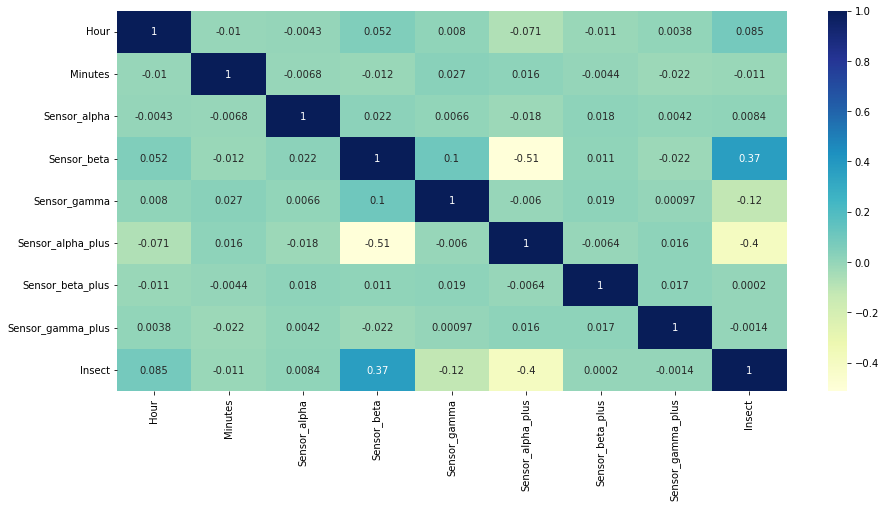

In [9]:
# Validamos correlaciones
correlation = df.corr()
fig = plt.figure (figsize = (15,7))
ax = fig.add_subplot(111)
df.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()  

In [10]:
# Verificamos cuales son las variables que poseen mas correlación con respecto a la variable de salida
df.corr()['Insect'].sort_values()

Sensor_alpha_plus   -0.397456
Sensor_gamma        -0.121449
Minutes             -0.011447
Sensor_gamma_plus   -0.001430
Sensor_beta_plus     0.000202
Sensor_alpha         0.008430
Hour                 0.085208
Sensor_beta          0.366754
Insect               1.000000
Name: Insect, dtype: float64

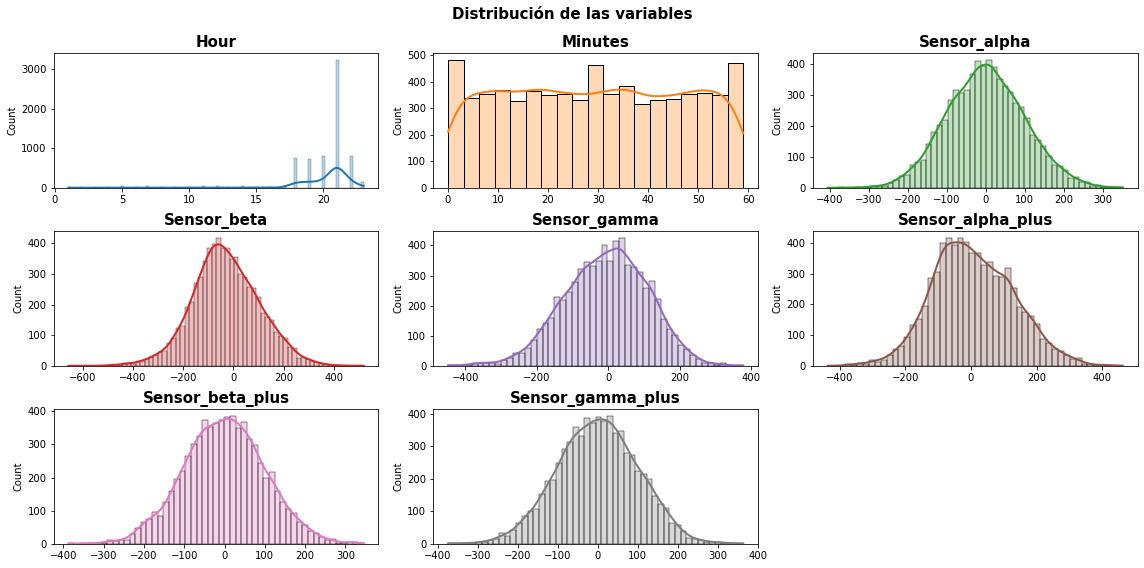

In [11]:
# Gráficas de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('Insect')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna 
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las variables', fontsize = 15, fontweight = "bold");

<Figure size 432x288 with 0 Axes>

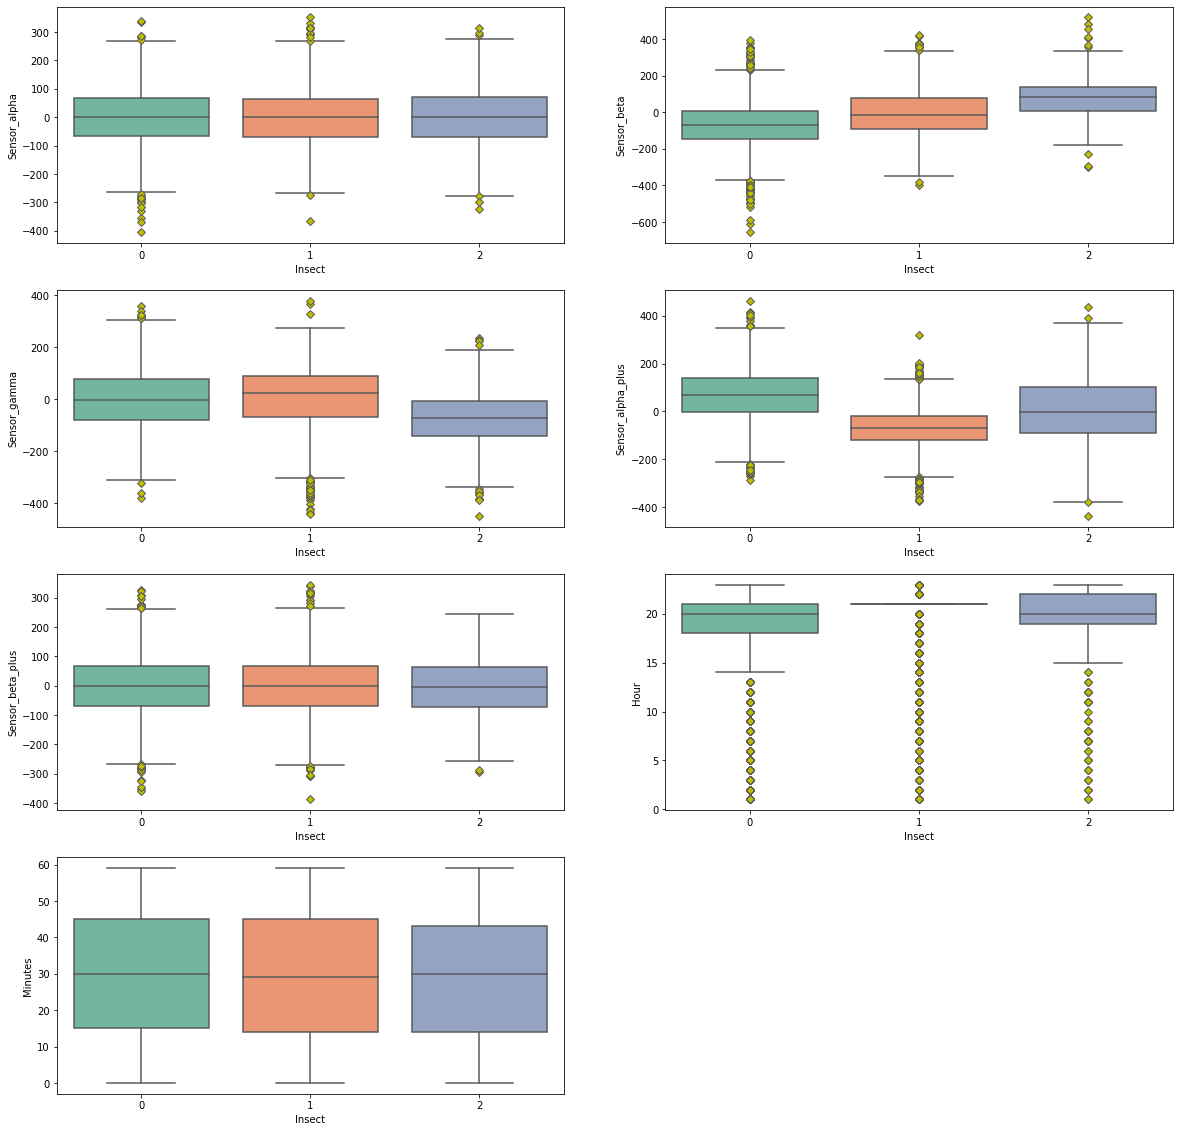

In [12]:
# Boxplot for class
den=pd.DataFrame(df)
plt.figure (1)
plt.subplots(figsize=(20,20))
green_diamond = dict(markerfacecolor='y', marker='D')
sns.set_palette("Set2")

plt.subplot(421)
sns.boxplot(x='Insect', y='Sensor_alpha', data=den, flierprops=green_diamond)

plt.subplot(422)
sns.boxplot(x='Insect', y='Sensor_beta', data=den, flierprops=green_diamond)

plt.subplot(423)
sns.boxplot(x='Insect', y='Sensor_gamma', data=den, flierprops=green_diamond)

plt.subplot(424)
sns.boxplot(x='Insect', y='Sensor_alpha_plus', data=den, flierprops=green_diamond)

plt.subplot(425)
sns.boxplot(x='Insect', y='Sensor_beta_plus', data=den, flierprops=green_diamond)

plt.subplot(426)
sns.boxplot(x='Insect', y='Hour', data=den, flierprops=green_diamond)

plt.subplot(427)
sns.boxplot(x='Insect', y='Minutes', data=den, flierprops=green_diamond)

plt.show() 

## Balanceo del dataset

In [13]:
# Conteo de la cantidad de datos por cada tipo de clase de insectos: 
df['Insect'].value_counts()

0    3519
1    2793
2     689
Name: Insect, dtype: int64

Como podemos ver hay 3519 ejemplos de tipo 0, 2793 ejemplos de tipo 1 y 689 ejemplos de tipo 2, danto un total de 7001 ejemplos que contiene el dataset, para poder tener una idea mas clara de la distribución de estos datos por tipo, veamos una representacion grafica de esta infomación:

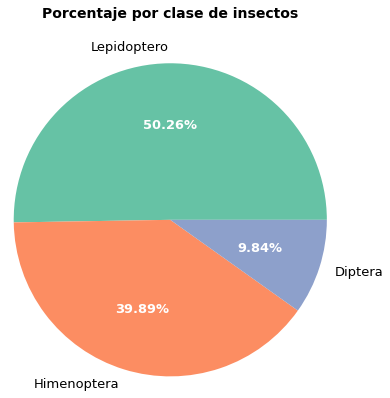

In [14]:
# Creación de una gráfica para representar el porcentaje de los insectos según sus 3 clases:
Gender = df['Insect'].value_counts()
names = 'Lepidoptero','Himenoptera','Diptera'
fig, ax = plt.subplots(figsize =(8, 6))
_, _, autotexts = ax.pie(x=Gender, labels=names, autopct="%.2f%%", radius=1.2,
                         colors=sns.color_palette("Set2"), explode=None, textprops=dict(fontsize=13))

ax.set_title('Porcentaje por clase de insectos', y=1.1,  weight='bold', fontsize=14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

En base a esta informacion podermos deducir que necesitaremos aplicar alguna técnica para equilibrar la cantidad de datos que posee el dataset y con eso los resultados no se vean afectados debido a las diferencias en cantidad de ejemplos que hay entre cada clase.

In [15]:
# Del conjunto de datos general separamos la variable de salida del resto de datos
X_df = df.drop("Insect", axis=1)
y_df = df["Insect"].copy()

In [16]:
# https://imbalanced-learn.org/dev/over_sampling.html
# Balanceo del dataset
# Inicializamos el método de sobremuestreo
Ros = RandomOverSampler()#random_state = 0
# Este método duplica las muestras de las clases menos representadas
X_Ros, y_Ros = Ros.fit_resample(X_df, y_df)
# Visualizamos el dataset equilibrado para las 3 clases
X_Ros

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983
1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180
2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009
3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882
4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138
...,...,...,...,...,...,...,...,...
10552,23,8,-152.453534,-41.190536,-78.272500,87.948156,-53.935738,98.815148
10553,19,5,-213.301784,141.073613,66.826018,-87.040548,-7.799692,-155.539974
10554,7,43,-63.410569,-98.889835,-21.220403,-168.755803,-29.165153,-161.666714
10555,23,13,-70.910859,-292.021504,-17.021001,-307.260924,84.443254,-105.377847


In [17]:
# Construcción de un pipeline para el escalado de los datos
scaler_pipeline = Pipeline([
        ('scaler', StandardScaler()),
    ])

In [18]:
# Escalado de los datos
X_scaled = scaler_pipeline.fit_transform(X_Ros)
# Transformación a un DataFrame de Pandas
X_scaled = pd.DataFrame(X_scaled, columns=X_Ros.columns, index=X_Ros.index)
# Visualización de los cambios
X_scaled

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,0.662371,-0.184947,1.178481,1.821633,-2.520653,1.946435,-0.526576,-1.111334
1,-2.771852,-0.761941,-0.911298,-2.021849,-1.368296,0.748606,0.388788,0.497525
2,0.376186,0.738242,-0.209462,-1.103567,0.630707,-0.691769,-0.495628,0.866977
3,0.376186,-0.704241,-0.221667,0.003298,-0.540601,-0.158342,-2.095599,0.174569
4,-0.482370,-0.761941,-0.587608,-0.098120,-1.144407,0.384909,-1.095516,-0.091716
...,...,...,...,...,...,...,...,...
10552,0.948556,-1.223535,-1.522884,-0.309229,-0.472856,0.690984,-0.530485,1.001398
10553,-0.196185,-1.396633,-2.126390,1.058166,0.772738,-0.663063,-0.065586,-1.547075
10554,-3.630408,0.795942,-0.639738,-0.742105,0.016906,-1.295368,-0.280879,-1.608461
10555,0.948556,-0.935039,-0.714128,-2.191031,0.052956,-2.367108,0.863917,-1.044483


In [19]:
# Unimos nuevamente la variable de salida al dataset para poder realizar la división del dataset
df_new= pd.concat([X_scaled,y_Ros], axis=1,sort=True)
# Visualizamos los cambios aplicados
df_new

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0.662371,-0.184947,1.178481,1.821633,-2.520653,1.946435,-0.526576,-1.111334,2
1,-2.771852,-0.761941,-0.911298,-2.021849,-1.368296,0.748606,0.388788,0.497525,0
2,0.376186,0.738242,-0.209462,-1.103567,0.630707,-0.691769,-0.495628,0.866977,1
3,0.376186,-0.704241,-0.221667,0.003298,-0.540601,-0.158342,-2.095599,0.174569,0
4,-0.482370,-0.761941,-0.587608,-0.098120,-1.144407,0.384909,-1.095516,-0.091716,2
...,...,...,...,...,...,...,...,...,...
10552,0.948556,-1.223535,-1.522884,-0.309229,-0.472856,0.690984,-0.530485,1.001398,2
10553,-0.196185,-1.396633,-2.126390,1.058166,0.772738,-0.663063,-0.065586,-1.547075,2
10554,-3.630408,0.795942,-0.639738,-0.742105,0.016906,-1.295368,-0.280879,-1.608461,2
10555,0.948556,-0.935039,-0.714128,-2.191031,0.052956,-2.367108,0.863917,-1.044483,2


## División del conjunto de datos

In [20]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [21]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(df_new, stratify='Insect')

In [22]:
# Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 6334
Longitud del Validation Set: 2111
Longitud del Test Set: 2112


In [23]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Insect", axis=1)
y_train = train_set["Insect"].copy()

In [24]:
# Conjunto de datos de pruebas
X_val = val_set.drop("Insect", axis=1)
y_val = val_set["Insect"].copy()

In [25]:
# Conjunto de datos de test
X_test = test_set.drop("Insect", axis=1)
y_test = test_set["Insect"].copy()

## Selección de los mejores modelos

In [26]:
# Pruebas de con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])
models.append(['Ada Boost', AdaBoostClassifier()])

# Evaluación de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 66.02% (1.87%)
SVM: 78.10% (2.26%)
KNeighbors: 77.22% (1.88%)
GaussianNB: 64.71% (1.71%)
BernoulliNB: 65.63% (2.66%)
Decision Tree: 89.56% (0.79%)
Random Forest: 93.62% (0.96%)
Ada Boost: 78.94% (2.05%)


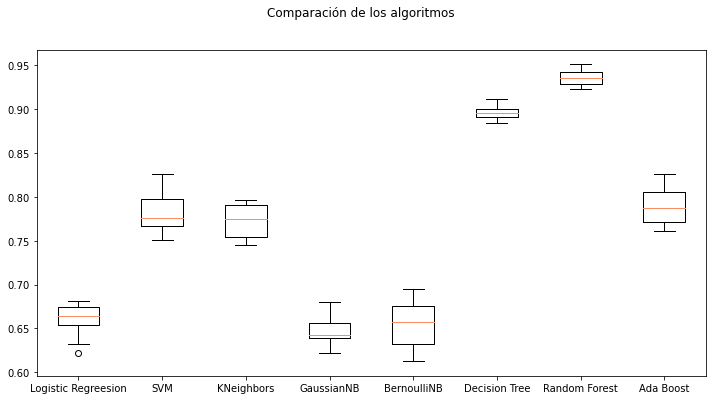

In [27]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig = plt.figure(figsize =(12,6))
fig.suptitle('Comparación de los algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hiperparametrización de los mejores modelos

In [28]:
# Búsqueda de los mejores parámetros para "K-Neighbors"
parameters1 = {"n_neighbors" : [1,3,5],
              "weights": ["uniform", "distance", None],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

model_KNN = KNeighborsClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid = GridSearchCV(estimator=model_KNN, param_grid=parameters1, cv=kFold, return_train_score=True)
grid_result1= grid.fit(X_train, y_train)

# mejores parámetros
grid_result1.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [29]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters2 = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid2 = GridSearchCV(estimator=model_DTC, param_grid=parameters2, cv=kFold, return_train_score=True)
grid_result2= grid2.fit(X_train, y_train)

# mejores parámetros
grid_result2.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 3,
 'splitter': 'best'}

In [30]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters3 = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

grid3 = GridSearchCV(estimator=model_RFC, param_grid=parameters3, cv=kFold, return_train_score=True)
grid_result3= grid3.fit(X_train, y_train)

# mejores parámetros
grid_result3.best_params_

{'bootstrap': False,
 'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'log2'}

## Evaluación del mejor modelo

In [31]:
# Comparación de modelos con los resultados de la búsqueda de los mejores parámetros 
models_hiper = []
models_hiper.append(['KNeighbors', KNeighborsClassifier(**grid_result1.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**grid_result2.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**grid_result3.best_params_)])

# Evaluación de los diferentes modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

KNeighbors: 83.09% (1.37%)
Decision Tree: 89.34% (0.85%)
Random Forest: 94.13% (1.00%)


In [32]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
mejor_modelo = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred = mejor_modelo.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred)

0.9355755566082425

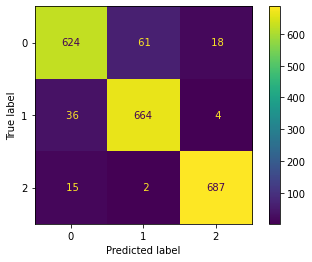

In [33]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo, X_val, y_val, values_format='3g')

In [34]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       703
           1       0.91      0.94      0.93       704
           2       0.97      0.98      0.97       704

    accuracy                           0.94      2111
   macro avg       0.94      0.94      0.94      2111
weighted avg       0.94      0.94      0.94      2111



In [35]:
# Realizamos una nueva predición con los datos de test
y_pred2 = mejor_modelo.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred2)

0.9417613636363636

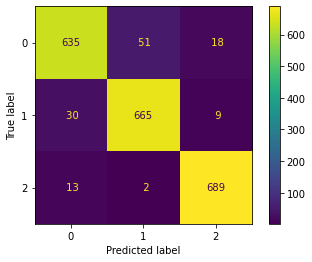

In [36]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo, X_test, y_test, values_format='3g')

In [37]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       704
           1       0.93      0.94      0.94       704
           2       0.96      0.98      0.97       704

    accuracy                           0.94      2112
   macro avg       0.94      0.94      0.94      2112
weighted avg       0.94      0.94      0.94      2112



## Evaluación del modelo con el conjunto de pruebas text_x.csv

In [38]:
# Lectura del dataset de prueba
dg=pd.read_csv('test_x.csv')
# Visualización inicial del conjunto de datos
dg

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973
2,7002,22,31,42.578382,-51.613402,125.055611,182.136746,-9.726951,-114.913402
3,7003,21,25,-64.150951,287.306752,-70.965473,13.789738,38.187260,137.761691
4,7004,18,11,193.750787,-61.989533,-110.347066,-16.864786,148.541916,232.424616
...,...,...,...,...,...,...,...,...,...
2995,9995,3,26,-101.913083,87.337077,77.193476,-79.694034,13.273965,143.004786
2996,9996,21,6,52.424913,-37.107249,120.373905,208.090551,-135.567057,-53.867634
2997,9997,21,0,-103.295133,34.736979,-195.018118,-164.294768,-26.993064,6.063715
2998,9998,20,13,170.027159,-73.100306,-117.330651,11.353824,-3.366007,-140.113661


In [39]:
# Eliminación de datos que son irrelevantes.
dg = dg.drop(['Unnamed: 0'], axis=1)

In [40]:
# scalado de los datos
X_scaled_prueba = scaler_pipeline.fit_transform(dg)
# Transformación a un DataFrame de Pandas
X_scaled_prueba = pd.DataFrame(X_scaled_prueba, columns=dg.columns, index=dg.index)
# Visualización de los cambios
X_scaled_prueba

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,0.401435,0.128352,-0.707627,0.099204,-0.397067,-0.652480,1.454389,-1.436279
1,0.401435,-1.501271,-1.933352,0.487961,0.774972,-0.272619,-1.250715,0.791658
2,0.686613,0.128352,0.448769,-0.203666,1.110678,1.432423,-0.094841,-1.149384
3,0.401435,-0.220853,-0.627624,2.351156,-0.549553,0.055101,0.383982,1.355248
4,-0.454098,-1.035664,1.973381,-0.281882,-0.883101,-0.195697,1.486794,2.293590
...,...,...,...,...,...,...,...,...
2995,-4.731764,-0.162652,-1.008465,0.843760,0.705302,-0.709731,0.135015,1.407220
2996,0.401435,-1.326669,0.548073,-0.094316,1.071025,1.644762,-1.352405,-0.544270
2997,0.401435,-1.675874,-1.022403,0.447254,-1.600236,-1.401887,-0.267388,0.049797
2998,0.116257,-0.919263,1.734122,-0.365637,-0.942250,0.035172,-0.031274,-1.399180


In [41]:
# Realizamos una nueva predicion con el conjunto de datos de pruebas proporcionados 
y_pred_pruebas = mejor_modelo.predict(X_scaled_prueba)

In [42]:
# Guardamos los resultados de la predicción
pd.DataFrame(y_pred_pruebas).to_csv("results.csv")

In [43]:
resultados=pd.read_csv('results.csv')